### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
sns.set_style('whitegrid')

### Import Data

In [3]:
description = pd.read_excel('C:/Users/HP/Desktop/House Price/House price Data Dictionary.xlsx').dropna()
description.style.set_properties(subset=['Description'], **{'width' :'850px'})

,#,Fields,Description
0,1,cid,a notation for a house
1,2,dayhours,Date house was sold
2,3,price,Price is prediction target
3,4,room_bed,Number of Bedrooms/House
4,5,room_bath,Number of bathrooms/bedrooms
5,6,living_measure,square footage of the home
6,7,lot_measure,quare footage of the lot
7,8,ceil,Total floors (levels) in house
8,9,coast,House which has a view to a waterfront
9,10,sight,Has been viewed


In [4]:
Data = pd.read_csv('C:/Users/HP/Desktop/House Price/House price dataset.csv')
Data.head(5).T

,0,1,2,3,4
cid,3876100940,3145600250,7129303070,7338220280,7950300670
dayhours,20150427T000000,20150317T000000,20140820T000000,20141010T000000,20150218T000000
price,600000,190000,735000,257000,450000
room_bed,4,2,4,3,2
room_bath,1.75,1,2.75,2.5,1
living_measure,3050,670,3040,1740,1120
lot_measure,9440,3101,2415,3721,4590
ceil,1,1,2,2,1
coast,0,0,1,0,0
sight,0,0,4,0,0


### understanding the data 

In [5]:
Data.info()
Data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

,count,mean,std,min,25%,50%,75%,max
cid,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.401822e+05,3.673622e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
room_bed,21505.0,3.371355e+00,9.302886e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
room_bath,21505.0,2.115171e+00,7.702481e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
living_measure,21596.0,2.079861e+03,9.184961e+02,2.900000e+02,1.429250e+03,1.910000e+03,2.550000e+03,1.354000e+04
lot_measure,21571.0,1.510458e+04,4.142362e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068450e+04,1.651359e+06
sight,21556.0,2.343663e-01,7.664376e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
quality,21612.0,7.656857e+00,1.175484e+00,1.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00,1.300000e+01
ceil_measure,21612.0,1.788367e+03,8.281025e+02,2.900000e+02,1.190000e+03,1.560000e+03,2.210000e+03,9.410000e+03
basement,21612.0,2.915225e+02,4.425808e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.600000e+02,4.820000e+03


In [6]:
Data.corr()['price'].sort_values()

zipcode            -0.053168
cid                -0.016797
lot_measure15       0.082603
lot_measure         0.089733
yr_renovated        0.126442
lat                 0.306919
room_bed            0.308040
basement            0.323825
sight               0.397522
room_bath           0.525179
furnished           0.566040
living_measure15    0.585186
ceil_measure        0.605593
quality             0.667477
living_measure      0.702149
price               1.000000
Name: price, dtype: float64

In [7]:
non_digit = pd.DataFrame()
for i in Data.yr_built:
  if i == '$':
    non_digit.append(DataFrame(data=[i.index]))

non_digit

""


In [8]:
Data = Data.replace(to_replace='$',value=np.NaN)

In [ ]:
#Let’s plot couple of features to get a better feel of the data
##Visualizing house prices

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


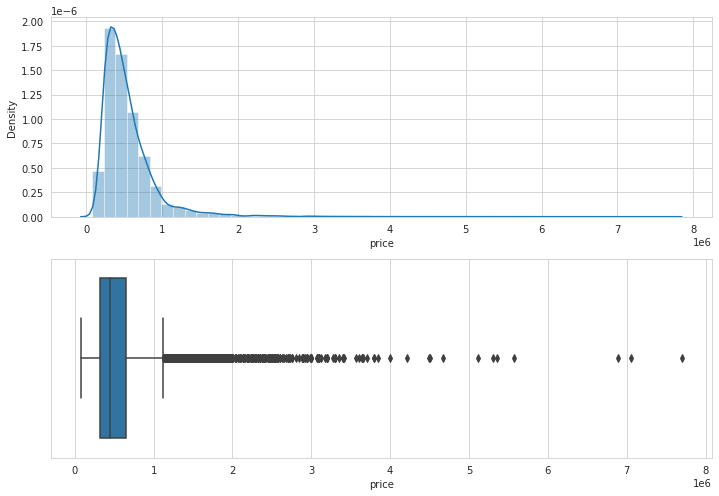

In [9]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(Data['price'])
fig.add_subplot(2,1,2)
sns.boxplot(Data['price'])
plt.tight_layout()

### Visualizing square footage of (home,lot,above and basement)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

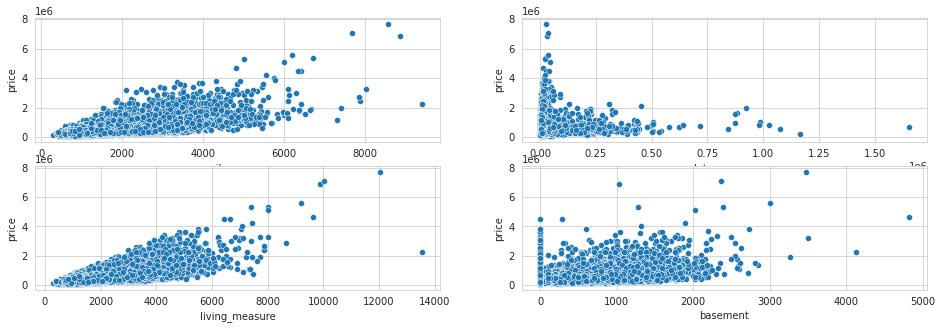

In [10]:
fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(Data['ceil_measure'], Data['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(Data['lot_measure'],Data['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(Data['living_measure'],Data['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(Data['basement'],Data['price'])

It is quit useful to have a quick overview of different features distribution vs house price.

In [11]:
Data.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

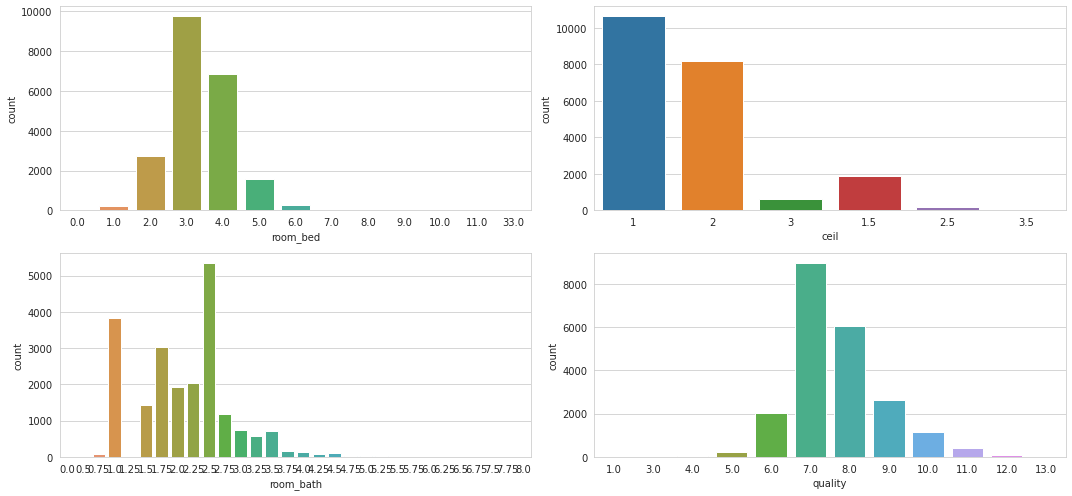

In [12]:
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(Data['room_bed'])
fig.add_subplot(2,2,2)
sns.countplot(Data['ceil'])
fig.add_subplot(2,2,3)
sns.countplot(Data['room_bath'])
fig.add_subplot(2,2,4)
sns.countplot(Data['quality'])
plt.tight_layout()

In [13]:
Data['dayhours'].head()

0    20150427T000000
1    20150317T000000
2    20140820T000000
3    20141010T000000
4    20150218T000000
Name: dayhours, dtype: object

In [14]:
time = Data['dayhours'].apply(lambda x : x[8:])

In [15]:
time.value_counts()

T000000    21613
Name: dayhours, dtype: int64

In [16]:
Data['dayhours'] = Data['dayhours'].apply(lambda x : x[:8])

In [17]:
all_length = [len(date) for date in Data['dayhours']]
length = DataFrame(all_length,columns=['length'])
length.value_counts()

length
8         21613
dtype: int64

In [18]:
Data['dayhours'] = pd.to_datetime(Data['dayhours'], format='%Y%m%d')

In [19]:
Data['dayhours'].head()

0   2015-04-27
1   2015-03-17
2   2014-08-20
3   2014-10-10
4   2015-02-18
Name: dayhours, dtype: datetime64[ns]

In [ ]:
#let's break date to years and months

In [20]:
Data['date'] = pd.to_datetime(Data['dayhours']).dt.strftime("%m%d%Y")
Data['month'] = Data['dayhours'].apply(lambda date:date.month)
Data['year'] = Data['dayhours'].apply(lambda date:date.year)

In [ ]:
#Data visualization house price vs months and years

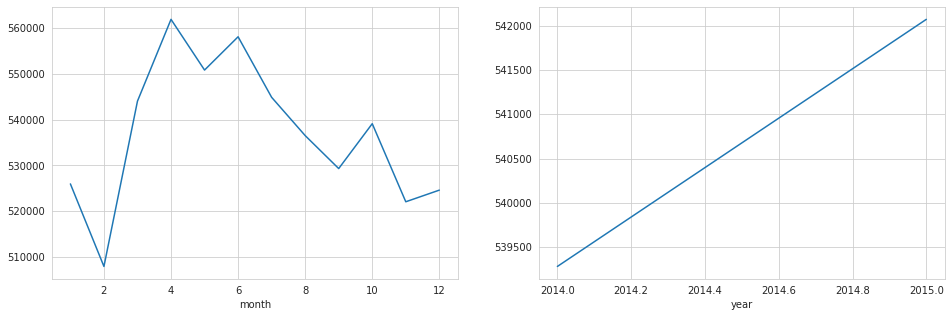

In [21]:
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
Data.groupby('month').mean()['price'].plot()
fig.add_subplot(1,2,2)
Data.groupby('year').mean()['price'].plot()

In [ ]:
#drop some unnecessary columns

In [22]:
Data = Data.drop('dayhours',axis=1)
Data = Data.drop('cid',axis=1)
Data = Data.drop('zipcode',axis=1)

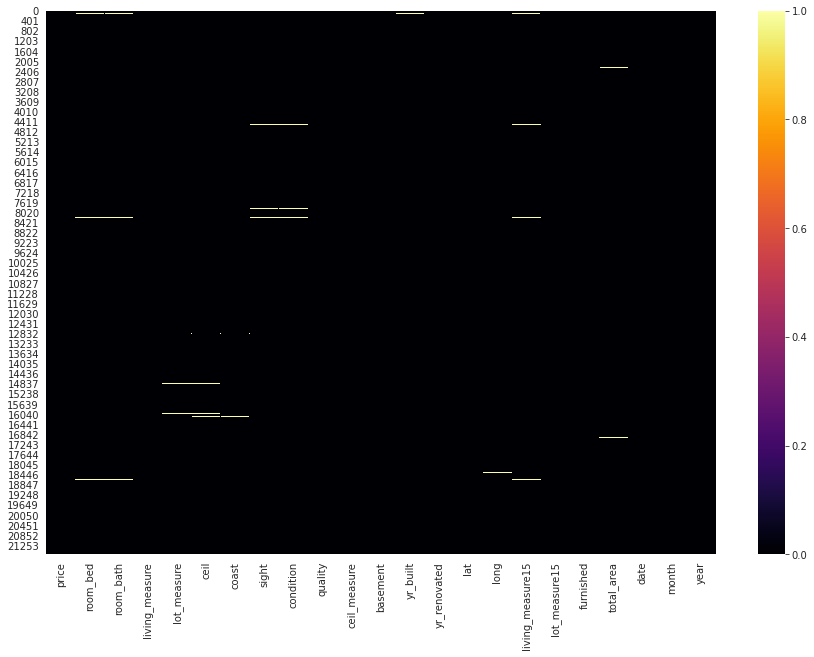

In [24]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(Data.isna(),cmap='inferno')

In [25]:
Data.room_bed.value_counts()

3.0     9767
4.0     6854
2.0     2747
5.0     1595
6.0      270
1.0      197
7.0       38
0.0       13
8.0       13
9.0        6
10.0       3
11.0       1
33.0       1
Name: room_bed, dtype: int64

In [ ]:
#finding variables with maximum  issing values 

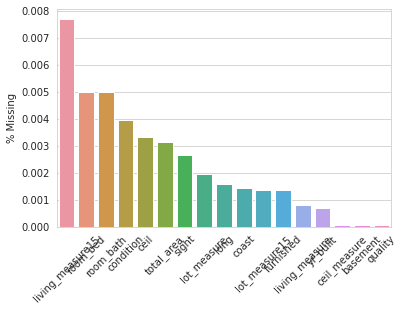

In [26]:
def viz_missing(df):

    missing = pd.DataFrame({
        'Missing':Data.isnull().sum(),
        '% Missing': Data.isnull().sum()/len(Data)
    })
    missing = missing[missing['% Missing'] > 0].sort_values(by='Missing', ascending=False)
    sns.barplot(x=missing.index, y='% Missing', data=missing)
    plt.xticks(rotation=45)
    plt.show()

viz_missing(Data)

For our two remaining continuous variable, room_bed , room_bath ,signt we will fill the missing data points with the median (chosen over mean because it is more robust to outliers in the data.

In [27]:
Data.room_bath.value_counts()

2.50    5358
1.00    3829
1.75    3031
2.25    2039
2.00    1917
1.50    1439
2.75    1178
3.00     750
3.50     726
3.25     588
3.75     155
4.00     135
4.50     100
4.25      78
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: room_bath, dtype: int64

In [28]:
Data.room_bed.value_counts()

3.0     9767
4.0     6854
2.0     2747
5.0     1595
6.0      270
1.0      197
7.0       38
0.0       13
8.0       13
9.0        6
10.0       3
11.0       1
33.0       1
Name: room_bed, dtype: int64

In [29]:
Data.sight.value_counts()

0.0    19437
2.0      959
3.0      510
1.0      332
4.0      318
Name: sight, dtype: int64

In [30]:
Data.condition.value_counts()

3    13978
4     5655
5     1694
2      171
1       30
Name: condition, dtype: int64

In [31]:
Data.ceil.value_counts()

1      10647
2       8210
1.5     1905
3        610
2.5      161
3.5        8
Name: ceil, dtype: int64

In [32]:
Data.furnished.value_counts()

0.0    17338
1.0     4246
Name: furnished, dtype: int64

In [33]:
Data.sight.value_counts()

0.0    19437
2.0      959
3.0      510
1.0      332
4.0      318
Name: sight, dtype: int64

In [34]:
Data.coast.value_counts()

0    21421
1      161
Name: coast, dtype: int64

In [35]:
Data.quality.value_counts()

7.0     8981
8.0     6067
9.0     2615
6.0     2038
10.0    1134
11.0     399
5.0      242
12.0      90
4.0       29
13.0      13
3.0        3
1.0        1
Name: quality, dtype: int64

In [36]:
Data.yr_built.value_counts()

2014    559
2006    454
2005    450
2004    433
2003    421
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

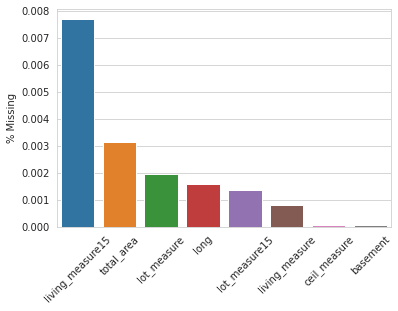

In [37]:
Data.room_bed.fillna(Data.room_bed.median(),inplace=True)
Data.room_bath.fillna(Data.room_bath.median(),inplace=True)
Data.sight.fillna(Data.sight.median(),inplace=True)
Data.condition.fillna(Data.condition.median(),inplace=True)
Data.ceil.fillna(Data.ceil.median(),inplace=True)
Data.furnished.fillna(Data.furnished.median(),inplace = True)
Data.sight.fillna(Data.sight.median(),inplace = True)
Data.coast.fillna(Data.coast.median(),inplace = True)
Data.quality.fillna(Data.quality.median(),inplace=True)
Data.yr_built.fillna(Data.yr_built.median(),inplace = True)
viz_missing(Data)

In [38]:
Data.columns

Index(['price', 'room_bed', 'room_bath', 'living_measure', 'lot_measure',
       'ceil', 'coast', 'sight', 'condition', 'quality', 'ceil_measure',
       'basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'living_measure15', 'lot_measure15', 'furnished', 'total_area', 'date',
       'month', 'year'],
      dtype='object')

In [ ]:
#filling all the columns with missing value.

In [39]:
mean_fill_columns = ['living_measure15','total_area','lot_measure','long','lot_measure15','living_measure','ceil_measure','basement']

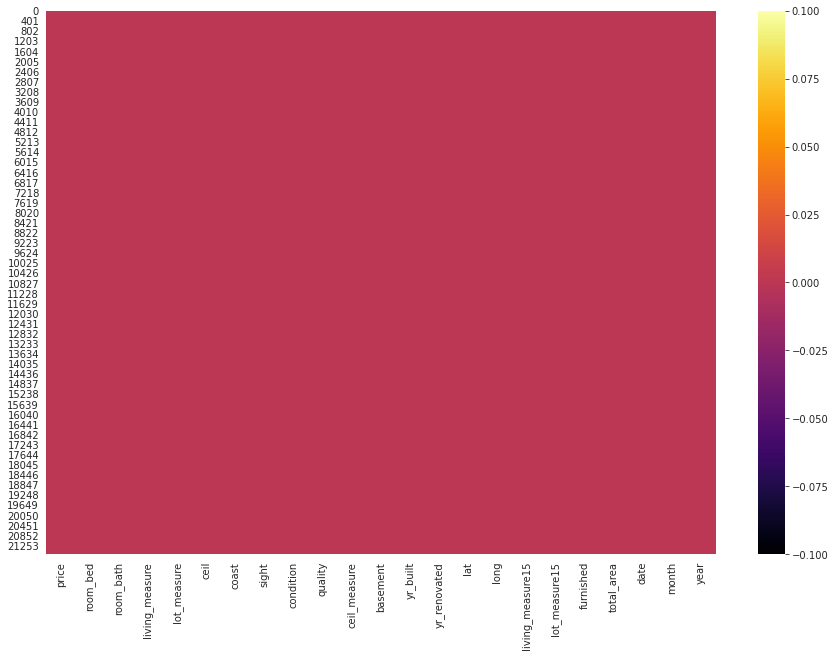

In [40]:
for var in mean_fill_columns:
  Data[var].fillna(Data[var].median(),inplace = True)
  
fig = plt.figure(figsize=(15,10))
sns.heatmap(Data.isna(),cmap='inferno')

In [ ]:
# Splitting the data in X and Y variables. Y assigned for price. 

In [41]:
X = Data.drop('price',axis =1).values
y = Data['price'].values

In [ ]:
#spliting the dataset in train and test set in 70:30 ratio

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [43]:
Data.dtypes[Data.dtypes=='datetime64[ns]']

Series([], dtype: object)

In [ ]:
#Scaling the dataset

In [44]:
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

# Model Selection and Evaluation

## Model 1: Linear Regressions
Simple Linear Regression is a linear relationship between a dependent variable Y and independent variables X
Let’s wrap the training process in our Regression model:

### Create a Linear Regression model.

In [45]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #creating regression model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Predicting the test set result

In [47]:
y_predd = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predd})
df1 = df.head(10)
df1

,Actual,Predicted
0,242500,6.248752e+04
1,1100000,1.006974e+06
2,574000,5.033640e+05
3,356500,3.958108e+05
4,330000,4.475899e+05
5,397000,4.399459e+05
6,442500,4.884633e+05
7,965000,1.156878e+06
8,1310000,1.038932e+06
9,252000,6.873040e+04


**Put results as a DataFrame**

In [48]:
coeff_df = pd.DataFrame(regressor.coef_, Data.drop('price',axis =1).columns, columns=['Coefficient']) 
coeff_df

,Coefficient
room_bed,-33475.383085
room_bath,38851.764395
living_measure,115182.107032
lot_measure,-348.133984
ceil,4045.946899
coast,47307.188668
sight,34446.406916
condition,21015.335551
quality,94844.112994
ceil_measure,42121.251904


By visualizing the residual we can see that is normally distributed (proof of having linear relationship with the dependent variable)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


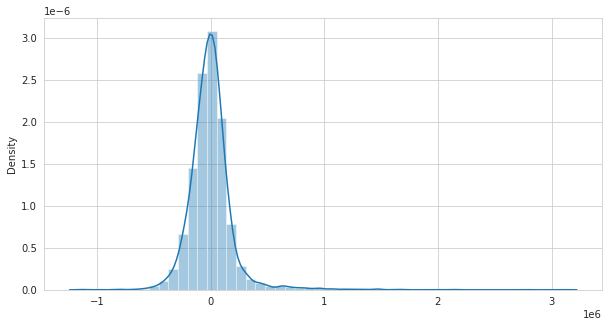

In [49]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_predd)
sns.distplot(residuals)

Let’s compare actual output and predicted value to measure how far our predictions are from the real house prices.

Compare actual output values with predicted values

In [50]:

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_predd})
df1 = df.head(10)
df1

,Actual,Predicted
0,242500,6.248752e+04
1,1100000,1.006974e+06
2,574000,5.033640e+05
3,356500,3.958108e+05
4,330000,4.475899e+05
5,397000,4.399459e+05
6,442500,4.884633e+05
7,965000,1.156878e+06
8,1310000,1.038932e+06
9,252000,6.873040e+04


Evaluate the performance of the algorithm (MAE - MSE - RMSE)

In [57]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('MAE:', metrics.mean_absolute_error(y_test, y_predd))  
print('MSE:', metrics.mean_squared_error(y_test, y_predd))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predd)))
print('VarScore:',metrics.explained_variance_score(y_test,y_predd))
print('R square:' , metrics.r2_score(y_test,y_predd))



MAE: 126112.13771193243
MSE: 41906053973.67552
RMSE: 204709.6821688596
VarScore: 0.7082972816478919
R square: 0.7082968032718521


## Model 2: Keras Regressions

Let’s create a baseline neural network model for the regression problem. Starting with all of the needed functions and objects.

### Creating a Neural Network Model

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [59]:
len(Data.columns)

23

Since we have 23 features, let’s insert 23 neurons as a start, 4 hidden layers and 1 output layer due to predict house Price.
Also, ADAM optimization algorithm is used for optimizing loss function (Mean squared error)

In [61]:
model = Sequential()
model.add(Dense(23,activation='relu'))
model.add(Dense(23,activation='relu'))
model.add(Dense(23,activation='relu'))
model.add(Dense(23,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss = "mean_squared_error")

Then, we train the model for 400 epochs, and each time record the training and validation accuracy in the history object. To keep track of how well the model is performing for each epoch, the model will run in both train and test data along with calculating the loss function.

In [62]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)
model.summary()

Epoch 1/400
114/114 [==============================] - 3s 5ms/step - loss: 410395049699.0609 - val_loss: 442758660096.0000
Epoch 2/400
114/114 [==============================] - 0s 3ms/step - loss: 419049491375.8608 - val_loss: 428264980480.0000
Epoch 3/400
114/114 [==============================] - 0s 3ms/step - loss: 395141942334.3304 - val_loss: 305471750144.0000
Epoch 4/400
114/114 [==============================] - 0s 3ms/step - loss: 235067952617.7391 - val_loss: 104590770176.0000
Epoch 5/400
114/114 [==============================] - 0s 3ms/step - loss: 86213504204.8000 - val_loss: 74565115904.0000
Epoch 6/400
114/114 [==============================] - 0s 3ms/step - loss: 67673055588.1739 - val_loss: 65707773952.0000
Epoch 7/400
114/114 [==============================] - 0s 3ms/step - loss: 59078535862.5391 - val_loss: 60182237184.0000
Epoch 8/400
114/114 [==============================] - 0s 3ms/step - loss: 57281689332.8696 - val_loss: 56285249536.0000
Epoch 9/400
114/114 [===

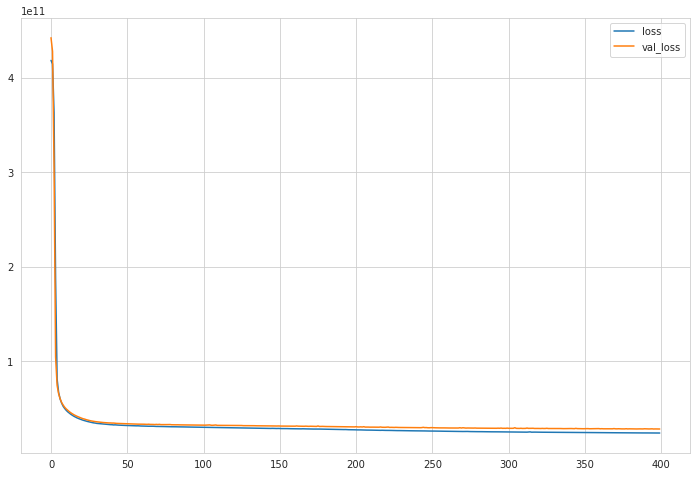

In [63]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

### Predicting the test set result

In [64]:
y_pred = model.predict(X_test)

**Evaluation metrics**

In [65]:
from sklearn import metrics

print('Mean Absolute Error: {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error: {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score is: {:.2f}'.format(metrics.explained_variance_score(y_test,y_pred)))
print('R square : {:.2f}'.format(metrics.r2_score(y_test,y_pred)))


Mean Absolute Error: 101078.14
Mean Squared Error: 28367872851.42
Root Mean Squared Error: 168427.65
Variance score is: 0.80
R square : 0.80


**Our predictions**

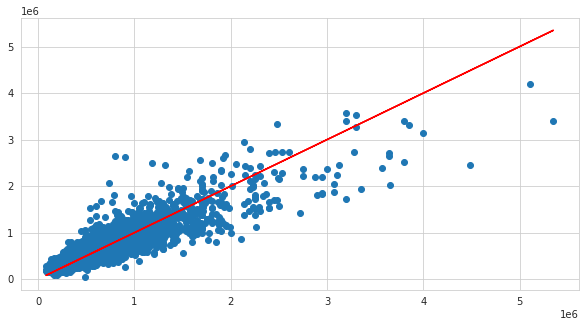

In [67]:
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'r')

## Model 3: Gradient Boosting Regression


In [68]:
from sklearn import ensemble
from sklearn.utils import shuffle

### Creating a Gradient Boosting Regression Model

In [69]:
params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [70]:
y_preddd = clf.predict(X_test)

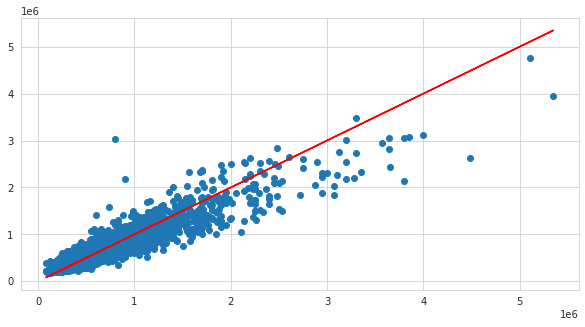

In [71]:
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_preddd)
plt.plot(y_test,y_test,'r')

### Predicting the test set result

In [73]:
print('Model: Gradient Boosting Regression\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_preddd))) 
print('Mean Squared Error(MSE):{:.2f}'.format(metrics.mean_squared_error(y_test, y_preddd)))  
print('Root Mean Squared Error(RMSE):{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_preddd))))
print('Variance score: {:.2f}'.format(metrics.explained_variance_score(y_test,y_preddd)*100))
print('R square : {:.2f}'.format(metrics.r2_score(y_test,y_preddd)))



Model: Gradient Boosting Regression

Mean Absolute Error(MAE): 79472.42
Mean Squared Error(MSE):18765297355.59
Root Mean Squared Error(RMSE):136986.49
Variance score: 86.94
R square : 0.87


## Multiple Linear Regression vs Keras Regression vs Gradient Boosting Regression

In [74]:
print('Model: Keras Regression\n')

print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_pred)))
print('Mean Squared Error(MSE): {:.2f}'.format(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Squared Error(RMSE): {:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Variance score: {:.2f}\n'.format(metrics.explained_variance_score(y_test,y_pred)*100))
print('R square : {:.2f}'.format(metrics.r2_score(y_test,y_pred)))




print('*********************************\n')
print('Model: Multiple Linear Regression\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_predd))) 
print('Mean Squared Error(MSE):{:.2f}'.format(metrics.mean_squared_error(y_test, y_predd)))  
print('Root Mean Squared Error(RMSE):{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_predd))))
print('Variance score: {:.2f}\n'.format(metrics.explained_variance_score(y_test,y_predd)*100))
print('R square:' , metrics.r2_score(y_test,y_predd))





print('*********************************\n')
print('Model: Gradient Boosting Regression\n')
print('Mean Absolute Error(MAE): {:.2f}'.format(metrics.mean_absolute_error(y_test, y_preddd))) 
print('Mean Squared Error(MSE):{:.2f}'.format(metrics.mean_squared_error(y_test, y_preddd)))  
print('Root Mean Squared Error(RMSE):{:.2f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_preddd))))
print('Variance score: {:.2f}'.format(metrics.explained_variance_score(y_test,y_preddd)*100))
print('R square : {:.2f}'.format(metrics.r2_score(y_test,y_preddd)))


Model: Keras Regression

Mean Absolute Error(MAE): 101078.14
Mean Squared Error(MSE): 28367872851.42
Root Mean Squared Error(RMSE): 168427.65
Variance score: 80.25

R square : 0.80
*********************************

Model: Multiple Linear Regression

Mean Absolute Error(MAE): 126112.14
Mean Squared Error(MSE):41906053973.68
Root Mean Squared Error(RMSE):204709.68
Variance score: 70.83

R square: 0.7082968032718521
*********************************

Model: Gradient Boosting Regression

Mean Absolute Error(MAE): 79472.42
Mean Squared Error(MSE):18765297355.59
Root Mean Squared Error(RMSE):136986.49
Variance score: 86.94
R square : 0.87
